In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import shap
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [2]:
df1 = pd.read_csv("preprocessed_data_v2.csv")
df1

,index,Device_Code,age,Hemoglobin_A1c,height_m,weight_kg,BMI,obesity_category,sex_F,sex_M,race_AMERICAN INDIAN/ALASKAN NATIVE,race_ASIAN,race_BLACK/AFRICAN AMERICAN,race_MULTIPLE,race_UNKNOWN,race_WHITE,ethnicity_Hispanic or Latino,ethnicity_Not Hispanic or Latino,ethnicity_UNKNOWN,insulin_delivery_MULTIPLE DAILY INJECTIONS,insulin_delivery_PUMP OR CLOSED LOOP,measure_sequence,Physicial_Activity,Calories_Burned,Heart_Rate,Insulin,Dietary_Total_Carbohydrate,Glucose,month,day,day_name,hour,hour_name
0,100,0,14.0,10.9,1.7526,70.306760,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,1.0,1,0.0,82.70864,0.0,0.0,125.666667,8,10,2,1,1
1,100,0,14.0,10.9,1.7526,70.306760,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,2.0,1,0.0,82.70864,0.0,0.0,125.000000,8,10,2,2,1
2,100,0,14.0,10.9,1.7526,70.306760,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,3.0,1,0.0,82.70864,0.0,0.0,159.654188,8,10,2,2,1
3,100,0,14.0,10.9,1.7526,70.306760,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,4.0,1,0.0,82.70864,0.0,0.0,125.000000,8,10,2,2,1
4,100,0,14.0,10.9,1.7526,70.306760,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,5.0,1,0.0,82.70864,0.0,0.0,130.333333,8,10,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264592,99,2,12.0,6.3,1.6256,57.606184,21.799259,2,1,0,0,0,0,0,0,1,0,1,0,0,1,956.0,1,0.0,82.70864,0.0,0.0,129.666667,10,15,5,22,8
264593,99,2,12.0,6.3,1.6256,57.606184,21.799259,2,1,0,0,0,0,0,0,1,0,1,0,0,1,957.0,1,0.0,82.70864,0.0,0.0,143.000000,10,15,5,23,8
264594,99,2,12.0,6.3,1.6256,57.606184,21.799259,2,1,0,0,0,0,0,0,1,0,1,0,0,1,958.0,1,0.0,82.70864,0.0,0.0,132.000000,10,15,5,23,8
264595,99,2,12.0,6.3,1.6256,57.606184,21.799259,2,1,0,0,0,0,0,0,1,0,1,0,0,1,959.0,1,0.0,82.70864,0.0,0.0,125.000000,10,15,5,23,8


## MULTIPLE DAILY INJECTIONS

In [3]:
df_mdi = df1[df1['insulin_delivery_MULTIPLE DAILY INJECTIONS']==1]

In [6]:
mdi_insulin_column = df_mdi['Insulin']
mdi_insulin_column.describe()

count    41471.000000
mean         0.450399
std          3.622547
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        167.500000
Name: Insulin, dtype: float64

In [12]:
np.sort(mdi_insulin_column.unique().tolist())

array([  0.       ,   0.5      ,   1.       ,   1.5      ,   2.       ,
         2.5      ,   3.       ,   3.5      ,   4.       ,   4.5      ,
         5.       ,   5.5      ,   6.       ,   6.0000001,   6.5      ,
         7.       ,   7.5      ,   8.       ,   8.5      ,   9.       ,
         9.5      ,  10.       ,  10.5      ,  11.       ,  11.5      ,
        12.       ,  12.5      ,  13.       ,  13.5      ,  14.       ,
        14.5      ,  15.       ,  16.       ,  16.5      ,  17.       ,
        17.5      ,  18.       ,  18.5      ,  19.       ,  19.5      ,
        20.       ,  20.5      ,  21.       ,  21.5      ,  22.       ,
        22.5      ,  23.       ,  24.       ,  25.       ,  25.5      ,
        26.       ,  26.5      ,  27.       ,  28.       ,  28.5      ,
        29.       ,  29.5      ,  30.       ,  31.       ,  31.5      ,
        32.       ,  33.       ,  33.5      ,  34.       ,  35.       ,
        36.       ,  37.       ,  38.       ,  39.       ,  39.5

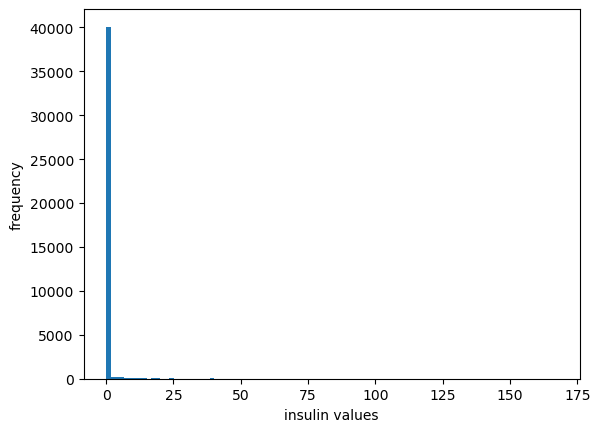

In [15]:
plt.hist(mdi_insulin_column, bins=100)
plt.xlabel('insulin values')
plt.ylabel('frequency')
plt.show()

In [99]:
def get_percent(mdi_insulin_column):
    print('Percentage of insulin value in the records:')
    
    filtered_data = mdi_insulin_column[mdi_insulin_column == 0]
    print('value = 0:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')
    
    filtered_data = mdi_insulin_column[(mdi_insulin_column > 0) & (mdi_insulin_column <= 5)]
    print('0 < value <= 5:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')
    
    filtered_data = mdi_insulin_column[mdi_insulin_column > 5]
    print('value > 5:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')

In [100]:
get_percent(mdi_insulin_column)

Percentage of insulin value in the records:
value = 0: 96.3034%
0 < value <= 5: 1.3889%
value > 5: 2.3076%


In [101]:
filtered_data = mdi_insulin_column[(mdi_insulin_column > 5) & (mdi_insulin_column <= 10)]
print('5 < value <= 10:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')

5 < value <= 10: 0.9115%


In [81]:
mdi_insulin_column_no0 = df_mdi[df_mdi['Insulin']!=0]['Insulin']
mdi_insulin_column_no0.describe()

count    1533.000000
mean       12.184279
std        14.565804
min         0.500000
25%         3.500000
50%         7.000000
75%        16.000000
max       167.500000
Name: Insulin, dtype: float64

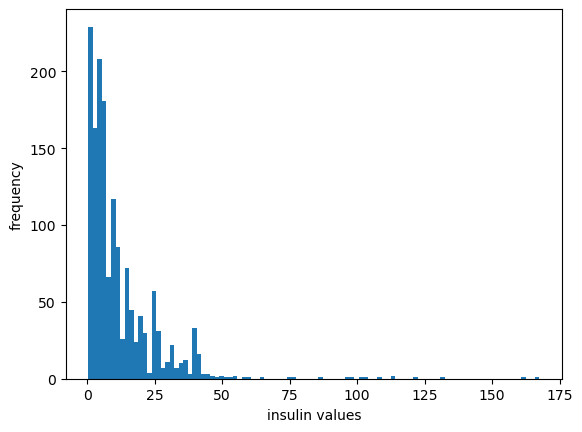

In [82]:
plt.hist(mdi_insulin_column_no0, bins=100)
plt.xlabel('insulin values')
plt.ylabel('frequency')
plt.show()

In [89]:
def get_percent2(mdi_insulin_column):
    print('Percentage of insulin value in the records after removed records with insulin value 0:')
    
    filtered_data = mdi_insulin_column[(mdi_insulin_column > 0) & (mdi_insulin_column <= 1)]
    print('0 < value <= 1:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')

    filtered_data = mdi_insulin_column[(mdi_insulin_column > 1) & (mdi_insulin_column <= 5)]
    print('1 < value <= 5:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')
    
    filtered_data = mdi_insulin_column[(mdi_insulin_column > 5) & (mdi_insulin_column <= 10)]
    print('5 < value <= 10:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')

    filtered_data = mdi_insulin_column[(mdi_insulin_column > 10) & (mdi_insulin_column <= 20)]
    print('10 < value <= 20:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')
    
    filtered_data = mdi_insulin_column[mdi_insulin_column > 20]
    print('value > 20:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')

In [90]:
get_percent2(mdi_insulin_column_no0)

Percentage of insulin value in the records after removed records with insulin value 0:
0 < value <= 1: 5.7404%
1 < value <= 5: 31.833%
5 < value <= 10: 24.6575%
10 < value <= 20: 19.7652%
value > 20: 18.0039%


In [61]:
df_mdi

,index,Device_Code,age,Hemoglobin_A1c,height_m,weight_kg,BMI,obesity_category,sex_F,sex_M,race_AMERICAN INDIAN/ALASKAN NATIVE,race_ASIAN,race_BLACK/AFRICAN AMERICAN,race_MULTIPLE,race_UNKNOWN,race_WHITE,ethnicity_Hispanic or Latino,ethnicity_Not Hispanic or Latino,ethnicity_UNKNOWN,insulin_delivery_MULTIPLE DAILY INJECTIONS,insulin_delivery_PUMP OR CLOSED LOOP,measure_sequence,Physicial_Activity,Calories_Burned,Heart_Rate,Insulin,Dietary_Total_Carbohydrate,Glucose,month,day,day_name,hour,hour_name
0,100,0,14.0,10.9,1.7526,70.30676,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,1.0,1,0.0,82.70864,0.0,0.0,125.666667,8,10,2,1,1
1,100,0,14.0,10.9,1.7526,70.30676,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,2.0,1,0.0,82.70864,0.0,0.0,125.000000,8,10,2,2,1
2,100,0,14.0,10.9,1.7526,70.30676,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,3.0,1,0.0,82.70864,0.0,0.0,159.654188,8,10,2,2,1
3,100,0,14.0,10.9,1.7526,70.30676,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,4.0,1,0.0,82.70864,0.0,0.0,125.000000,8,10,2,2,1
4,100,0,14.0,10.9,1.7526,70.30676,22.889245,2,0,1,0,1,0,0,0,0,0,1,0,1,0,5.0,1,0.0,82.70864,0.0,0.0,130.333333,8,10,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257887,86,0,12.0,7.9,1.6510,54.43104,19.968824,2,0,1,0,0,0,0,0,1,0,1,0,1,0,917.0,1,0.0,82.70864,0.0,0.0,182.666667,6,10,4,22,8
257888,86,0,12.0,7.9,1.6510,54.43104,19.968824,2,0,1,0,0,0,0,0,1,0,1,0,1,0,918.0,1,0.0,82.70864,0.0,0.0,182.333333,6,10,4,23,8
257889,86,0,12.0,7.9,1.6510,54.43104,19.968824,2,0,1,0,0,0,0,0,1,0,1,0,1,0,919.0,1,0.0,82.70864,0.0,0.0,183.000000,6,10,4,23,8
257890,86,0,12.0,7.9,1.6510,54.43104,19.968824,2,0,1,0,0,0,0,0,1,0,1,0,1,0,920.0,1,0.0,82.70864,0.0,0.0,183.666667,6,10,4,23,8


In [62]:
# remove rows which the hour are following:
values_to_remove = [23, 0, 1, 2, 3, 4, 5, 6, 7]

df_mdi2 = df_mdi[~df_mdi['hour'].isin(values_to_remove)]

In [63]:
mdi_insulin_column2 = df_mdi2['Insulin']
mdi_insulin_column2.describe()

count    25976.000000
mean         0.594626
std          4.238566
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        167.500000
Name: Insulin, dtype: float64

In [64]:
get_percent(mdi_insulin_column2)

Percentage of insulin value in the records:
value = 0: 95.1301%
0 < value <= 5: 1.5591%
value > 5: 3.0528%


In [65]:
get_percent(mdi_insulin_column)

Percentage of insulin value in the records:
value = 0: 96.3034%
0 < value <= 5: 1.1767%
value > 5: 2.3076%


## MACHINE

In [91]:
df_m = df1[df1['insulin_delivery_MULTIPLE DAILY INJECTIONS']==0]

In [92]:
m_insulin_column = df_m['Insulin']
m_insulin_column.describe()

count    223126.000000
mean          0.550651
std           1.898219
min           0.000000
25%           0.000000
50%           0.000000
75%           0.282000
max          49.200000
Name: Insulin, dtype: float64

In [102]:
def get_percent(mdi_insulin_column):
    print('Percentage of insulin value in the records:')
    
    filtered_data = mdi_insulin_column[mdi_insulin_column == 0]
    print('value = 0:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')
    
    filtered_data = mdi_insulin_column[(mdi_insulin_column > 0) & (mdi_insulin_column <= 1)]
    print('0 < value <= 1:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')
    
    # filtered_data = mdi_insulin_column[(mdi_insulin_column > 1) & (mdi_insulin_column <= 5)]
    # print('1 < value <= 5:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')
    
    filtered_data = mdi_insulin_column[mdi_insulin_column > 1]
    print('value > 1:', str(round((len(filtered_data) / len(mdi_insulin_column)) * 100, 4))+'%')

In [103]:
get_percent(m_insulin_column)

Percentage of insulin value in the records:
value = 0: 54.1828%
0 < value <= 1: 35.3684%
value > 1: 10.4488%
